# Audience Decode – Exploratory Data Analysis (EDA)

This notebook performs exploratory data analysis (EDA) on the `viwer_interactions.db` SQLite database.
It focuses on:
- basic dataset structure,
- ratings distribution,
- user activity and time span,
- movie popularity,
- platform-level activity over time.


In [4]:
# Audience Decode – EDA Notebook

import sqlite3
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Display options
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

sns.set()
plt.rcParams["figure.figsize"] = (10, 5)

DB_PATH = "./viewer_interactions.db"  # make sure this file is in the same folder as this notebook
assert Path(DB_PATH).exists(), f"Database not found at {DB_PATH}"


In [5]:
# List tables in the SQLite database
conn = sqlite3.connect(DB_PATH)

tables = pd.read_sql(
    "SELECT name AS table_name FROM sqlite_master WHERE type='table' ORDER BY name;",
    conn,
)
tables


,table_name
0,data_dictionary
1,movie_statistics
2,movies
3,user_statistics
4,viewer_ratings


In [6]:
# Load main tables into DataFrames
viewer_ratings = pd.read_sql("SELECT * FROM viewer_ratings;", conn)
movies = pd.read_sql("SELECT * FROM movies;", conn)
user_statistics = pd.read_sql("SELECT * FROM user_statistics;", conn)
movie_statistics = pd.read_sql("SELECT * FROM movie_statistics;", conn)
data_dictionary = pd.read_sql("SELECT * FROM data_dictionary;", conn)

conn.close()

print("Shapes:")
print("viewer_ratings:", viewer_ratings.shape)
print("movies:", movies.shape)
print("user_statistics:", user_statistics.shape)
print("movie_statistics:", movie_statistics.shape)
print("data_dictionary:", data_dictionary.shape)


Shapes:
viewer_ratings: (4025000, 5)
movies: (18008, 3)
user_statistics: (438780, 10)
movie_statistics: (16015, 11)
data_dictionary: (31, 4)


In [7]:
# Quick peek at each table
print("viewer_ratings.head():")
display(viewer_ratings.head())

print("\nmovies.head():")
display(movies.head())

print("\nuser_statistics.head():")
display(user_statistics.head())

print("\nmovie_statistics.head():")
display(movie_statistics.head())

print("\ndata_dictionary:")
display(data_dictionary)


viewer_ratings.head():


,movie_id,customer_id,rating,date,anomalous_date
0,17,1481737,3.0,2005-10-09,NaN
1,9236,1448424,5.0,2005-11-15,NaN
2,4640,2308980,NaN,2005-08-06,NaN
3,9330,674346,3.0,2005-04-29,NaN
4,4570,1304045,4.0,2005-09-19,NaN



movies.head():


,movie_id,year_of_release,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW



user_statistics.head():


,customer_id,total_ratings,avg_rating,std_rating,min_rating,max_rating,unique_movies,first_rating_date,last_rating_date,activity_days
0,1965326,8.0,3.250000,0.886405,2.0,5.0,8.0,2004-08-11,2005-06-06,299.0
1,506434,1.0,4.000000,NaN,4.0,4.0,1.0,2005-08-02,2005-08-02,0.0
2,1365167,3.0,4.666667,0.577350,4.0,5.0,3.0,2004-11-16,2005-01-19,64.0
3,396632,2.0,NaN,0.000000,4.0,4.0,2.0,2004-07-07,2004-07-07,0.0
4,260614,3.0,4.333333,0.577350,4.0,5.0,3.0,2004-03-02,2004-10-13,NaN



movie_statistics.head():


,movie_id,total_ratings,avg_rating,std_rating,min_rating,max_rating,unique_users,first_rating_date,last_rating_date,year_of_release,title
0,1,548.0,3.744526,1.073389,1.0,5.0,548.0,2003-07-12,2005-12-30,2003.0,Dinosaur Planet
1,2,146.0,3.547945,1.281606,1.0,5.0,146.0,2004-10-16,2005-12-20,2004.0,Isle of Man TT 2004 Review
2,3,2013.0,3.639841,0.978873,1.0,5.0,2013.0,2000-10-19,2005-12-30,1997.0,Character
3,4,142.0,2.739437,1.302913,1.0,5.0,142.0,2003-12-06,2005-12-27,1994.0,Paula Abdul's Get Up & Dance
4,5,1140.0,3.919298,1.292436,1.0,5.0,1140.0,2004-11-02,2005-12-29,2004.0,The Rise and Fall of ECW



data_dictionary:


,table_name,field_name,data_type,description
0,viewer_ratings,movie_id,integer,Unique movie identifier (1-17770 for original ...
1,viewer_ratings,customer_id,integer,Anonymous customer identifier (1-2649429 with ...
2,viewer_ratings,rating,integer,"Rating score (1-5 stars, integers only)"
3,viewer_ratings,date,date,"Date when rating was given (YYYY-MM-DD, range:..."
4,movies,movie_id,integer,Unique movie identifier
5,movies,year_of_release,integer,"Year of DVD release (1890-2005, may differ fro..."
6,movies,title,string,"Movie title in English (Netflix titles, may di..."
7,user_statistics,customer_id,integer,Anonymous customer identifier
8,user_statistics,total_ratings,integer,Total number of ratings given by user
9,user_statistics,avg_rating,float,Average rating given by user


In [8]:
# Basic viewer_ratings statistics
viewer_ratings["rating"] = pd.to_numeric(viewer_ratings["rating"], errors="coerce")
viewer_ratings["date"] = pd.to_datetime(viewer_ratings["date"], errors="coerce")

print("viewer_ratings info:")
viewer_ratings.info()

total_rows = len(viewer_ratings)
non_null_ratings = viewer_ratings["rating"].notna().sum()
null_ratings = viewer_ratings["rating"].isna().sum()

print("\n=== Rating completeness ===")
print(f"Total rows:           {total_rows:,}")
print(f"Non-null ratings:     {non_null_ratings:,} ({non_null_ratings / total_rows:.2%})")
print(f"Null ratings:         {null_ratings:,} ({null_ratings / total_rows:.2%})")

print("\n=== Rating distribution (value counts) ===")
display(viewer_ratings["rating"].value_counts(dropna=False).sort_index())

print("\n=== Rating describe ===")
display(viewer_ratings["rating"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))


viewer_ratings info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4025000 entries, 0 to 4024999
Data columns (total 5 columns):
 #   Column          Dtype         
---  ------          -----         
 0   movie_id        int64         
 1   customer_id     int64         
 2   rating          float64       
 3   date            datetime64[ns]
 4   anomalous_date  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 153.5 MB

=== Rating completeness ===
Total rows:           4,025,000
Non-null ratings:     3,622,500 (90.00%)
Null ratings:         402,500 (10.00%)

=== Rating distribution (value counts) ===


rating
0.0        385
1.0     166369
2.0     354148
3.0    1026947
4.0    1256745
5.0     817530
6.0        376
NaN     402500
Name: count, dtype: int64


=== Rating describe ===


count    3.622500e+06
mean     3.608666e+00
std      1.078211e+00
min      0.000000e+00
10%      2.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
90%      5.000000e+00
max      6.000000e+00
Name: rating, dtype: float64

=== Coverage ===
Unique users:   438,570
Unique movies:  16,013

=== Ratings per user ===
Mean:   8.26
Median: 4.00
Std:    11.68

=== Ratings per movie ===
Mean:   226.22
Median: 1.00
Std:    3246.93


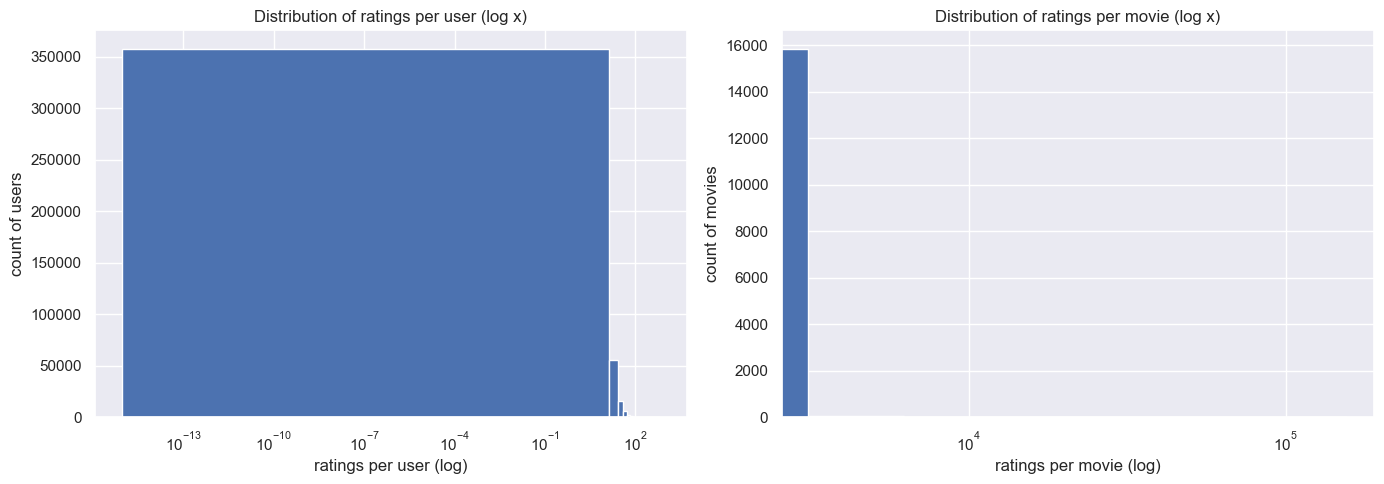

In [9]:
# Unique users, movies, and per-entity averages
n_users = viewer_ratings["customer_id"].nunique()
n_movies = viewer_ratings["movie_id"].nunique()

print("=== Coverage ===")
print(f"Unique users:   {n_users:,}")
print(f"Unique movies:  {n_movies:,}")

ratings_per_user = viewer_ratings.groupby("customer_id")["rating"].count()
ratings_per_movie = viewer_ratings.groupby("movie_id")["rating"].count()

print("\n=== Ratings per user ===")
print(f"Mean:   {ratings_per_user.mean():.2f}")
print(f"Median: {ratings_per_user.median():.2f}")
print(f"Std:    {ratings_per_user.std():.2f}")

print("\n=== Ratings per movie ===")
print(f"Mean:   {ratings_per_movie.mean():.2f}")
print(f"Median: {ratings_per_movie.median():.2f}")
print(f"Std:    {ratings_per_movie.std():.2f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(ratings_per_user, bins=50)
axes[0].set_xscale("log")
axes[0].set_title("Distribution of ratings per user (log x)")
axes[0].set_xlabel("ratings per user (log)")
axes[0].set_ylabel("count of users")

axes[1].hist(ratings_per_movie, bins=50)
axes[1].set_xscale("log")
axes[1].set_title("Distribution of ratings per movie (log x)")
axes[1].set_xlabel("ratings per movie (log)")
axes[1].set_ylabel("count of movies")

plt.tight_layout()
plt.show()


=== Time range of ratings ===
From: 1995-01-01 00:00:00 to: 2006-03-28 00:00:00
Rows with anomalous_date = 1: 1,209

=== Ratings per year ===


year
1995        123
1996        119
1997        115
1998        402
1999       1976
2000      33873
2001      66673
2002     165365
2003     337604
2004    1158575
2005    1857298
2006        377
Name: rating, dtype: int64

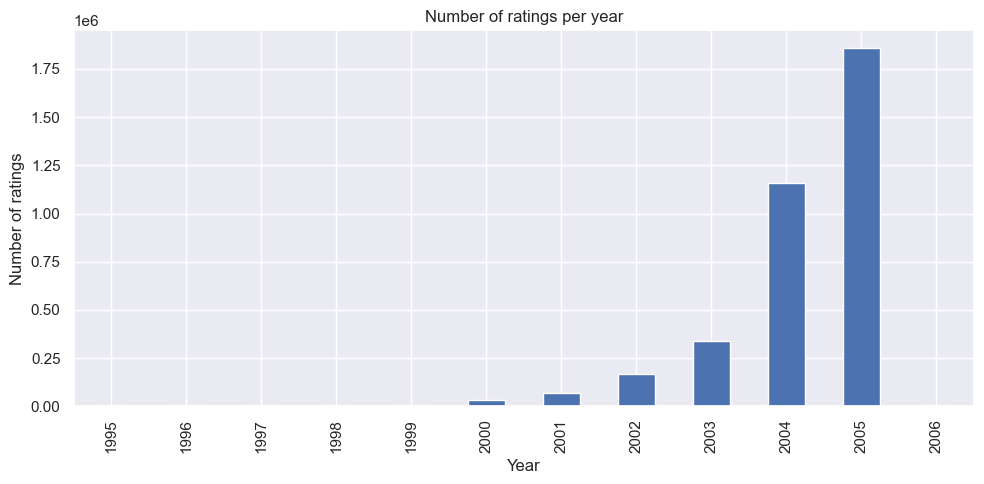

In [10]:
# Time dimension of viewer_ratings
print("=== Time range of ratings ===")
min_date = viewer_ratings["date"].min()
max_date = viewer_ratings["date"].max()
print(f"From: {min_date} to: {max_date}")

if "anomalous_date" in viewer_ratings.columns:
    anomalous_count = (viewer_ratings["anomalous_date"] == 1).sum()
    print(f"Rows with anomalous_date = 1: {anomalous_count:,}")

ratings_per_year = (
    viewer_ratings.dropna(subset=["date"])
    .assign(year=lambda df: df["date"].dt.year)
    .groupby("year")["rating"]
    .count()
)

print("\n=== Ratings per year ===")
display(ratings_per_year)

ratings_per_year.plot(kind="bar")
plt.title("Number of ratings per year")
plt.xlabel("Year")
plt.ylabel("Number of ratings")
plt.tight_layout()
plt.show()


=== Movies basic stats ===
Total movies rows:   18,008
Distinct movie_id:   18,006

=== Year of release stats ===


count    18001.000000
mean      1990.232543
std         16.445821
min       1896.000000
25%       1985.000000
50%       1997.000000
75%       2002.000000
max       2005.000000
Name: year_of_release, dtype: float64


Movies with missing year_of_release: 7

=== Movies per decade ===


decade
1890       1
1900       1
1910      24
1920      81
1930     219
1940     359
1950     561
1960     952
1970    1370
1980    2212
1990    5223
2000    6998
Name: count, dtype: Int64

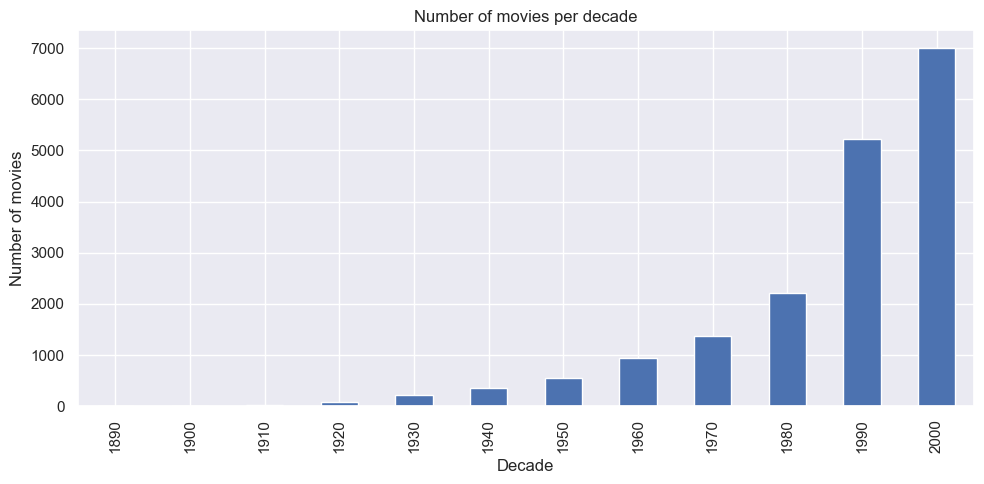

In [11]:
# Movies table: year of release stats
movies["year_of_release"] = pd.to_numeric(movies["year_of_release"], errors="coerce")

print("=== Movies basic stats ===")
print(f"Total movies rows:   {len(movies):,}")
print(f"Distinct movie_id:   {movies['movie_id'].nunique():,}")

print("\n=== Year of release stats ===")
display(movies["year_of_release"].describe())

missing_years = movies["year_of_release"].isna().sum()
print(f"\nMovies with missing year_of_release: {missing_years:,}")

movies["decade"] = (movies["year_of_release"] // 10 * 10).astype("Int64")
decade_counts = movies["decade"].value_counts().sort_index()
print("\n=== Movies per decade ===")
display(decade_counts)

decade_counts.plot(kind="bar")
plt.title("Number of movies per decade")
plt.xlabel("Decade")
plt.ylabel("Number of movies")
plt.tight_layout()
plt.show()


=== user_statistics info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438780 entries, 0 to 438779
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        438780 non-null  int64  
 1   total_ratings      416841 non-null  float64
 2   avg_rating         416841 non-null  float64
 3   std_rating         332528 non-null  float64
 4   min_rating         416841 non-null  float64
 5   max_rating         416841 non-null  float64
 6   unique_movies      416841 non-null  float64
 7   first_rating_date  438780 non-null  object 
 8   last_rating_date   438780 non-null  object 
 9   activity_days      416841 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 33.5+ MB

=== total_ratings per user ===


count    416841.000000
mean          9.287268
std          14.298646
min           1.000000
10%           1.000000
25%           2.000000
50%           4.000000
75%          11.000000
90%          23.000000
max         764.000000
Name: total_ratings, dtype: float64


=== unique_movies per user ===


count    416841.000000
mean          9.234881
std          13.406546
min           1.000000
10%           1.000000
25%           2.000000
50%           4.000000
75%          11.000000
90%          23.000000
max         764.000000
Name: unique_movies, dtype: float64


=== activity_days per user ===


count    416841.000000
mean        275.437246
std         389.072857
min           0.000000
10%           0.000000
25%           0.000000
50%         102.000000
75%         408.000000
90%         822.000000
max        3941.000000
Name: activity_days, dtype: float64


=== Users by total_ratings bucket ===


,count,share
total_ratings_bucket,,
1,84372,0.192288
2–5,148720,0.338940
6–10,71486,0.162920
11–50,105056,0.239428
51–100,6458,0.014718
100+,749,0.001707


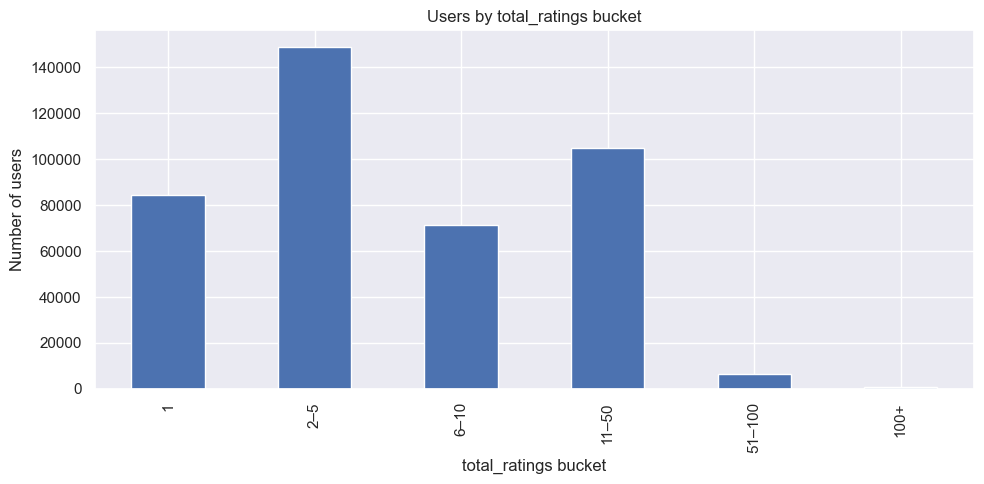

In [12]:
# User statistics: total_ratings, unique_movies, activity_days
for col in ["total_ratings", "unique_movies", "activity_days", "avg_rating"]:
    if col in user_statistics.columns:
        user_statistics[col] = pd.to_numeric(user_statistics[col], errors="coerce")

print("=== user_statistics info ===")
user_statistics.info()

print("\n=== total_ratings per user ===")
display(user_statistics["total_ratings"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))

print("\n=== unique_movies per user ===")
display(user_statistics["unique_movies"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))

print("\n=== activity_days per user ===")
display(user_statistics["activity_days"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))

bins_tr = [0, 1, 5, 10, 50, 100, np.inf]
labels_tr = ["1", "2–5", "6–10", "11–50", "51–100", "100+"]

user_statistics["total_ratings_bucket"] = pd.cut(
    user_statistics["total_ratings"], bins=bins_tr, labels=labels_tr, include_lowest=True
)

bucket_counts_tr = user_statistics["total_ratings_bucket"].value_counts().sort_index()
bucket_share_tr = bucket_counts_tr / len(user_statistics)

print("\n=== Users by total_ratings bucket ===")
display(pd.DataFrame({"count": bucket_counts_tr, "share": bucket_share_tr}))

bucket_counts_tr.plot(kind="bar")
plt.title("Users by total_ratings bucket")
plt.xlabel("total_ratings bucket")
plt.ylabel("Number of users")
plt.tight_layout()
plt.show()


=== avg_rating per user ===


count    416841.000000
mean          3.632195
std           0.812457
min           0.000000
10%           2.730769
25%           3.185185
50%           3.687500
75%           4.000000
90%           4.625000
max           6.000000
Name: avg_rating, dtype: float64


=== Users by avg_rating segment ===


,count,share
avg_rating_segment,,
neutral (3–4],262837,0.599018
high (>4),101939,0.232324
low (<3),52065,0.118659
missing,21939,0.050000


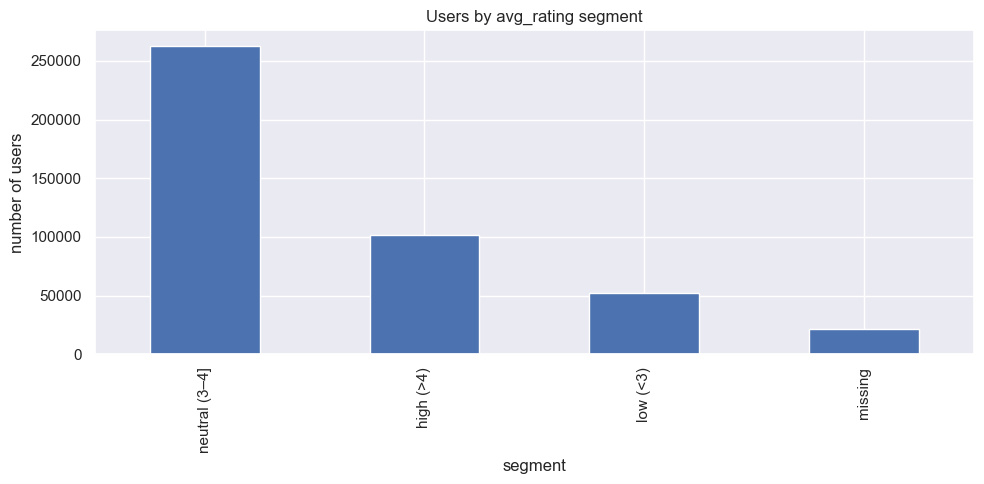

In [13]:
# User strictness / generosity (avg_rating)
print("=== avg_rating per user ===")
display(user_statistics["avg_rating"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))

def rating_segment(x):
    if pd.isna(x):
        return "missing"
    if x < 3:
        return "low (<3)"
    if x <= 4:
        return "neutral (3–4]"
    return "high (>4)"

user_statistics["avg_rating_segment"] = user_statistics["avg_rating"].apply(rating_segment)

seg_counts = user_statistics["avg_rating_segment"].value_counts()
seg_share = seg_counts / len(user_statistics)

print("\n=== Users by avg_rating segment ===")
display(pd.DataFrame({"count": seg_counts, "share": seg_share}))

seg_counts.plot(kind="bar")
plt.title("Users by avg_rating segment")
plt.xlabel("segment")
plt.ylabel("number of users")
plt.tight_layout()
plt.show()


=== activity_days stats ===


count    416841.000000
mean        275.437246
std         389.072857
min           0.000000
10%           0.000000
25%           0.000000
50%         102.000000
75%         408.000000
90%         822.000000
max        3941.000000
Name: activity_days, dtype: float64


=== ratings_per_active_day stats ===


count    271726.000000
mean          0.159658
std           0.786547
min           0.000542
10%           0.008791
25%           0.015942
50%           0.033784
75%           0.085106
90%           0.238095
max          53.000000
Name: ratings_per_active_day, dtype: float64


=== ratings_per_month stats ===


count    271726.000000
mean          4.789727
std          23.596417
min           0.016265
10%           0.263736
25%           0.478261
50%           1.013514
75%           2.553191
90%           7.142857
max        1590.000000
Name: ratings_per_month, dtype: float64


=== Users by activity_days bucket ===


,count,share
activity_days_bucket,,
≤1 day,132855,0.302783
2–30 days,28839,0.065725
1–6 months,82264,0.187483
6–24 months,122300,0.278727
>24 months,50583,0.115281



=== Users by ratings_per_month bucket ===


,count,share
ratings_per_month_bucket,,
<1 / month,134934,0.307521
1–3 / month,77852,0.177428
3–10 / month,39879,0.090886
10–30 / month,12907,0.029416
>30 / month,6154,0.014025


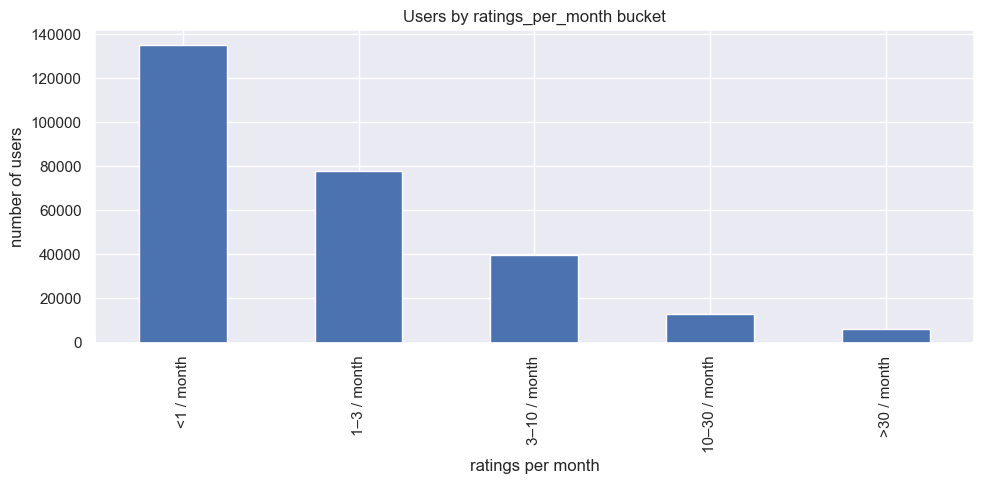

In [14]:
# User lifetime & rating frequency (time-focused stats)
activity_days_valid = user_statistics["activity_days"].replace(0, np.nan)

user_statistics["ratings_per_active_day"] = (
    user_statistics["total_ratings"] / activity_days_valid
)
user_statistics["ratings_per_month"] = (
    user_statistics["total_ratings"] / (activity_days_valid / 30)
)

print("=== activity_days stats ===")
display(user_statistics["activity_days"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))

print("\n=== ratings_per_active_day stats ===")
display(
    user_statistics["ratings_per_active_day"].describe(
        percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]
    )
)

print("\n=== ratings_per_month stats ===")
display(
    user_statistics["ratings_per_month"].describe(
        percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]
    )
)

bins_ad = [-1, 1, 30, 180, 730, np.inf]
labels_ad = ["≤1 day", "2–30 days", "1–6 months", "6–24 months", ">24 months"]

user_statistics["activity_days_bucket"] = pd.cut(
    user_statistics["activity_days"], bins=bins_ad, labels=labels_ad
)

bucket_counts_ad = user_statistics["activity_days_bucket"].value_counts().sort_index()
bucket_share_ad = bucket_counts_ad / len(user_statistics)

print("\n=== Users by activity_days bucket ===")
display(pd.DataFrame({"count": bucket_counts_ad, "share": bucket_share_ad}))

bins_rpm = [0, 1, 3, 10, 30, np.inf]
labels_rpm = ["<1 / month", "1–3 / month", "3–10 / month", "10–30 / month", ">30 / month"]

user_statistics["ratings_per_month_bucket"] = pd.cut(
    user_statistics["ratings_per_month"], bins=bins_rpm, labels=labels_rpm
)

bucket_counts_rpm = user_statistics["ratings_per_month_bucket"].value_counts().sort_index()
bucket_share_rpm = bucket_counts_rpm / len(user_statistics)

print("\n=== Users by ratings_per_month bucket ===")
display(pd.DataFrame({"count": bucket_counts_rpm, "share": bucket_share_rpm}))

bucket_counts_rpm.plot(kind="bar")
plt.title("Users by ratings_per_month bucket")
plt.xlabel("ratings per month")
plt.ylabel("number of users")
plt.tight_layout()
plt.show()


=== Platform activity per month ===


,ratings,active_users,ratings_per_active_user
year_month,,,
1995-01,25,27,0.925926
1995-02,10,11,0.909091
1995-03,13,13,1.000000
1995-04,12,13,0.923077
1995-05,10,10,1.000000
1995-06,12,14,0.857143
1995-07,14,17,0.823529
1995-08,14,16,0.875000
1995-09,13,16,0.812500


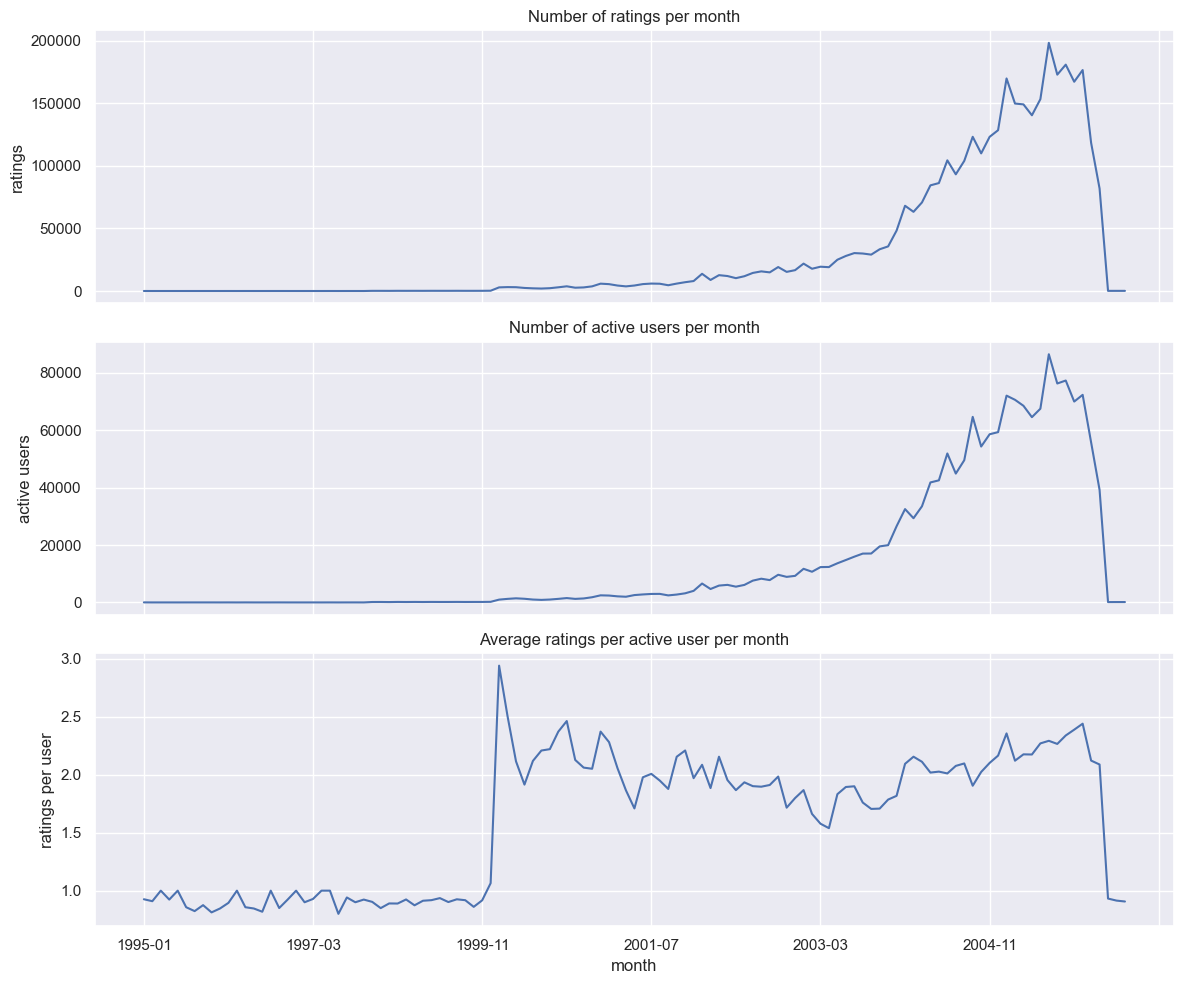

In [15]:
# Platform-level activity over calendar time
vr_time = viewer_ratings.dropna(subset=["date"]).copy()
vr_time["year"] = vr_time["date"].dt.year
vr_time["year_month"] = vr_time["date"].dt.to_period("M").astype(str)

ratings_per_month = vr_time.groupby("year_month")["rating"].count()
active_users_per_month = vr_time.groupby("year_month")["customer_id"].nunique()

activity_df = pd.DataFrame(
    {
        "ratings": ratings_per_month,
        "active_users": active_users_per_month,
    }
)
activity_df["ratings_per_active_user"] = (
    activity_df["ratings"] / activity_df["active_users"]
)

print("=== Platform activity per month ===")
display(activity_df.head(20))

fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

activity_df["ratings"].plot(ax=axes[0])
axes[0].set_title("Number of ratings per month")
axes[0].set_ylabel("ratings")

activity_df["active_users"].plot(ax=axes[1])
axes[1].set_title("Number of active users per month")
axes[1].set_ylabel("active users")

activity_df["ratings_per_active_user"].plot(ax=axes[2])
axes[2].set_title("Average ratings per active user per month")
axes[2].set_ylabel("ratings per user")
axes[2].set_xlabel("month")

plt.tight_layout()
plt.show()


=== movie_statistics basic stats ===


,total_ratings,unique_users,avg_rating
count,15215.000000,15215.000000,15215.000000
mean,260.044167,251.864344,2.999851
std,3696.938525,3631.045822,1.312297
min,1.000000,1.000000,0.000000
10%,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000
50%,1.000000,1.000000,3.000000
75%,2.000000,2.000000,4.000000
90%,3.000000,3.000000,5.000000
max,173598.000000,173598.000000,6.000000



=== Movies by total_ratings bucket ===


,count,share
total_ratings_bucket,,
1–10,14474,0.903778
11–100,37,0.002310
101–1000,409,0.025539
1000+,295,0.018420



=== Top 10 most rated movies ===


,movie_id,title,total_ratings,avg_rating
5974,9340,Pearl Harbor,173598.0,3.397960
3043,4656,Erin Brockovich,130783.0,3.813454
3027,4640,Rain Man,122159.0,4.125255
8638,13462,The General's Daughter,118884.0,3.359720
29,30,Something's Gotta Give,118413.0,3.761842
2964,4577,Steel Magnolias,106295.0,3.857679
190,191,X2: X-Men United,98720.0,3.932202
174,175,Reservoir Dogs,90451.0,4.003814
8578,13402,The Count of Monte Cristo,83567.0,3.879019
196,197,Taking Lives,81262.0,3.478945



=== Top 10 highest rated movies (>= 100 ratings) ===


,movie_id,title,total_ratings,avg_rating
8680,13504,"House, M.D.: Season 1",1592.0,4.522613
12,13,Lord of the Rings: The Return of the King: Ext...,127.0,4.496063
6070,9436,Full Metal Panic FUMOFFU,413.0,4.450363
84,85,Elfen Lied,268.0,4.231343
2993,4606,Scrapped Princess,161.0,4.229814
8644,13468,Law & Order: Season 3,3106.0,4.223117
222,223,Chappelle's Show: Season 1,24127.0,4.211008
5960,9326,Queer as Folk: Season 3,7688.0,4.194849
8675,13499,Babylon 5: A Call to Arms,2231.0,4.180188
32,33,Aqua Teen Hunger Force: Vol. 1,6891.0,4.168336



=== Correlation between total_ratings and avg_rating ===


,total_ratings,avg_rating
total_ratings,1.000000,0.032642
avg_rating,0.032642,1.000000


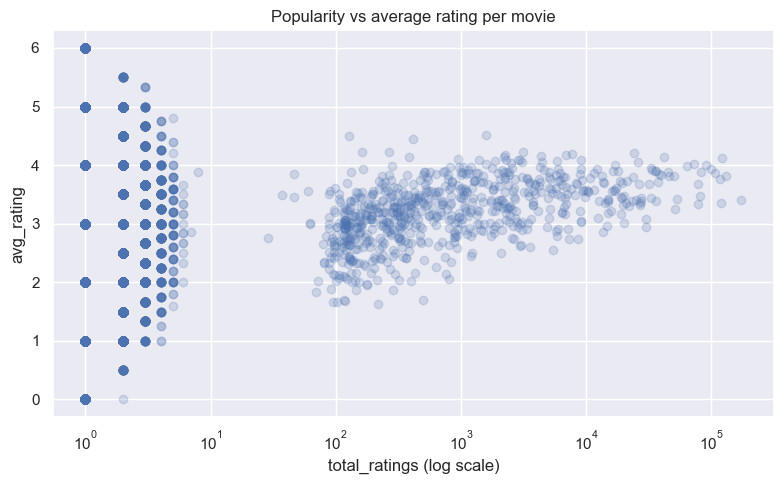

In [16]:
# Movie-level statistics & correlations
for col in ["total_ratings", "unique_users", "avg_rating", "year_of_release"]:
    if col in movie_statistics.columns:
        movie_statistics[col] = pd.to_numeric(movie_statistics[col], errors="coerce")

print("=== movie_statistics basic stats ===")
display(
    movie_statistics[["total_ratings", "unique_users", "avg_rating"]].describe(
        percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]
    )
)

bins_mr = [0, 10, 100, 1000, np.inf]
labels_mr = ["1–10", "11–100", "101–1000", "1000+"]

movie_statistics["total_ratings_bucket"] = pd.cut(
    movie_statistics["total_ratings"], bins=bins_mr, labels=labels_mr
)

bucket_counts_mr = movie_statistics["total_ratings_bucket"].value_counts().sort_index()
bucket_share_mr = bucket_counts_mr / len(movie_statistics)

print("\n=== Movies by total_ratings bucket ===")
display(pd.DataFrame({"count": bucket_counts_mr, "share": bucket_share_mr}))

top_most_rated = movie_statistics.sort_values("total_ratings", ascending=False).head(10)
print("\n=== Top 10 most rated movies ===")
display(top_most_rated[["movie_id", "title", "total_ratings", "avg_rating"]])

min_ratings_threshold = 100
mask = movie_statistics["total_ratings"] >= min_ratings_threshold
top_high_rated = (
    movie_statistics[mask]
    .sort_values("avg_rating", ascending=False)
    .head(10)
)
print(f"\n=== Top 10 highest rated movies (>= {min_ratings_threshold} ratings) ===")
display(top_high_rated[["movie_id", "title", "total_ratings", "avg_rating"]])

corr = movie_statistics[["total_ratings", "avg_rating"]].corr()
print("\n=== Correlation between total_ratings and avg_rating ===")
display(corr)

plt.figure(figsize=(8, 5))
plt.scatter(
    movie_statistics["total_ratings"],
    movie_statistics["avg_rating"],
    alpha=0.2,
)
plt.xscale("log")
plt.xlabel("total_ratings (log scale)")
plt.ylabel("avg_rating")
plt.title("Popularity vs average rating per movie")
plt.tight_layout()
plt.show()


In [17]:
# User-level correlations between activity metrics
corr_user = user_statistics[
    ["total_ratings", "activity_days", "ratings_per_month"]
].corr()

print("=== Correlations between user activity metrics ===")
display(corr_user)


=== Correlations between user activity metrics ===


,total_ratings,activity_days,ratings_per_month
total_ratings,1.000000,0.435295,0.039095
activity_days,0.435295,1.000000,-0.158508
ratings_per_month,0.039095,-0.158508,1.000000
